In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Расстояние от можества точек до функции #

Рассмотрим множество точек $A_1=(x_1,y_1), \dots A_n=(x_n, y_n)$ и функуцию $y=f(x)$.

Для каждой точки $A_i=(x_i,y_i)$ найдем величину $r_i = |f(x_i)-y_i|$, т.е. расстояние от точки до функции по вертикали. 

Расстоянием (среднеквадратичной ошибкой) от множества точек $A_1, \dots, A_n$ до функции $y=f(x)$ назовем величину:
$$
R = \sqrt{\frac{1}{n}\sum_{i=1}^n r_i^2} = \sqrt{\frac{1}{n}\sum_{i=1}^n (f(x_i) - y_i)^2}
$$

Если функция $f(x)$ -- является линейной, т.е. $f(x) = a_1x + a_0$, то формула приобретает вид:
$$
R = \sqrt{\frac{1}{n}\sum_{i=1}^n (a_1x_i + a_0 - y_i)^2}
$$

При фиксироанных точках $A_1, \dots, A_n$, наc будет интересовать поиск функции такой $f(x)$, что величина $R$ была бы минимальной. 

Пример вычисления $R$.

R = 21.66333307688362


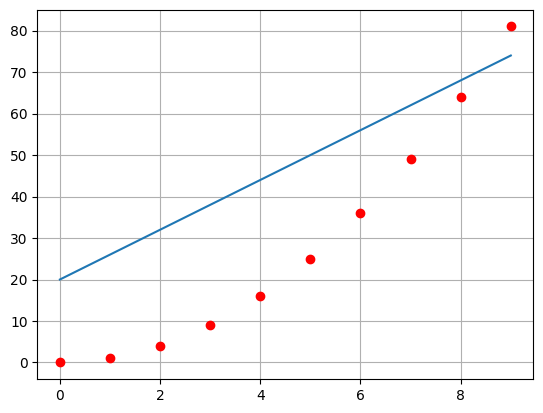

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

n = 10
X = np.arange(n)
Y = np.array([i**2 for i in range(n)])

A = np.array([20,6]) # прямая f(x) = 6x + 2

def getDistance(X,Y,A):
    R = 0
    for i in range(len(X)):
        r = A[1]*X[i]+A[0]-Y[i]
        R += r*r
    return math.sqrt(R / len(X))


print('R =', getDistance(X,Y,A))

linsp  = np.linspace(X.min(), X.max())
f = np.poly1d(np.flip(A)) # Создаем поллином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика
plt.plot(linsp,fun);
plt.plot(X,Y, 'ro');
plt.grid(True);



# Задание

Далее идут 3 задания:
* Оценка 5 ставится за 3 задания.
* Оценка 4 ставится за 2 задания.
* Оценка 3 ставится за 1 задания.

### Задание 1 ###

Реализуйте функцию getDistance для полинома произвольной степени $d$

$$
R = \sqrt{\frac{1}{n}\sum_{i=1}^n r_i^2} = \sqrt{\frac{1}{n}\sum_{i=1}^n (f(x_i) - y_i)^2}
$$

2956.2885177194735


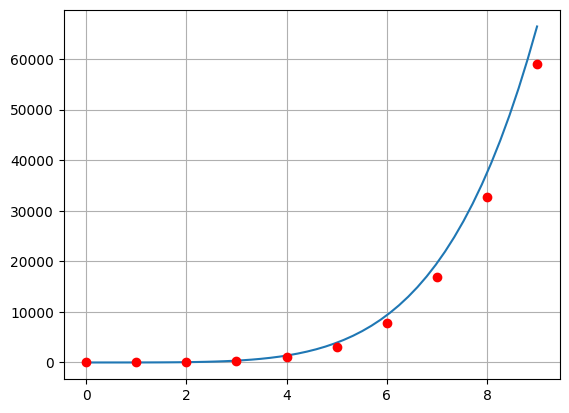

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
d = 5
X = np.arange(n)
Y = np.array([i**d for i in range(n)])
A = np.ones(d+1) #Коэффциенты полинома степени d равны 1, но можно поменять

def getDistance(X,Y,A):
    f = lambda i: sum([ x**i * A[i] for i in range(d+1)])
    R = 0
    for x, y in zip(X, Y):
      R += (f(x) - y)**2
    return np.sqrt(R * 1/n)

print(getDistance(X,Y,A))

linsp  = np.linspace(X.min(), X.max())
f = np.poly1d(np.flip(A)) # Создаем поллином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика
plt.plot(linsp,fun)
plt.plot(X,Y, 'ro')
plt.grid(True)

## Метод наименьших квадратов

http://setosa.io/ev/ordinary-least-squares-regression/

Рассмотрим четыре точки $(0, -1)$, $(0,1)$, $(3,2)$ и $(3,4)$. Очевидно, что эти точки не лежат на одной прямой, тем не менее попытаемся найти прямую вида $y = kx + l$, которая проходила бы через все эти точки.

Запишем сисему:
$$
\left\{
\begin{matrix}
k \cdot 0 + l = -1 \\
k \cdot 0 + l = 1 \\
k \cdot 3 + l = 2 \\
k \cdot 3 + l = 4 \\
\end{matrix}
\right.
$$

Или в матричном виде:
$$
\begin{pmatrix}
0 & 1 \\
0 & 1 \\
3 & 1 \\
3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
-1 \\
1 \\
2 \\
4 \\
\end{pmatrix}
$$

Или в общем виде:
$$
AX=B
$$

Оказывается, что "решение" данной системы методом наименьших квадратов может быть найдено, если данное равенство умножить слева на $A^t$, т.е.
$$
A^tAX=A^tB
$$

В нашем случае мы получаем:
$$
\begin{pmatrix}
0 & 0 & 3 & 3 \\
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
0 & 1 \\
0 & 1 \\
3 & 1 \\
3 & 1 \\
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 3 & 3 \\
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
-1 \\
1 \\
2 \\
4 \\
\end{pmatrix}
$$

Умножаем матрицы:

$$
\begin{pmatrix}
18 & 6\\
6 & 4 
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
18 \\
6 \\
\end{pmatrix}
$$

Откуда получаем решение $k = 1$, $l=0$ системы и искомую прямую
$$
y = 1 \cdot x + 0.
$$

Решение: [1. 0.]


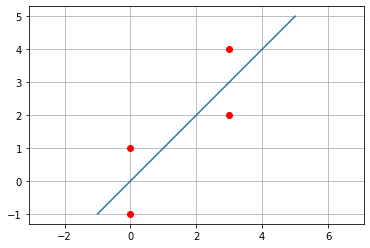

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # Печать чисел "в простой форме" без 'e'

x = np.array([0, 0, 3, 3])
y = np.array([-1, 1, 4, 2])

A = np.vstack([x, np.ones(len(x))]).T
P = A.T.dot(A)
q = A.T.dot(y)
R = np.linalg.solve(P,q)

print('Решение:', R)

plt.plot(x,y,'ro')

linsp = np.linspace(-1, 5)

f = np.poly1d(R) # Создаем поллином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика

plt.plot(linsp,fun)
plt.axis([-1,5,-5,5])
plt.axis('equal')
plt.grid(True)


### Задание 2 ###

При помощи метода наименьших квадратов найти функцию вида 
$$
y = a_2x^2 + a_1x + a_0,
$$
которая наиболее близко располагается между пяти заданных точек.

Решение: [0.55319149 0.38297872]


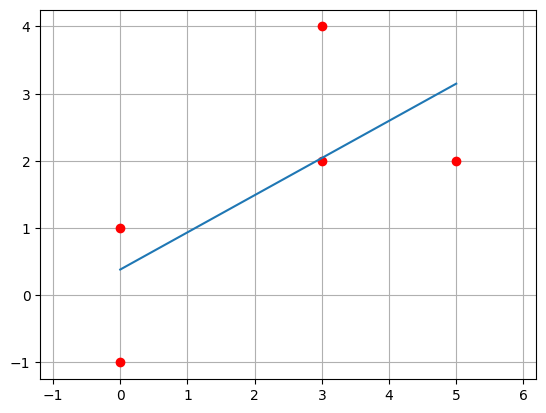

In [10]:
x = np.array([0, 0, 3, 3, 5])
y = np.array([-1, 1, 4, 2, 2])

A = np.vstack([x, np.ones(len(x))]).T
P = A.T.dot(A)
q = A.T.dot(y)
R = np.linalg.solve(P,q)

print('Решение:', R)

plt.plot(x,y,'ro')

linsp = np.linspace(x.min(), x.max())

f = np.poly1d(R) # Создаем поллином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика

plt.plot(linsp,fun)
plt.axis([-1,5,-5,5])
plt.axis('equal')
plt.grid(True)

### Задание 3 ###
Реализуйте метод наименьших квадратов для произвольного многочлена степени $d$ и произвольного множества точке, мощности $n$.
Постройте последовательно графики данных многочленов для $d=1,2, \dots, n-1$

Решение: [-0.09893554  0.26564142]


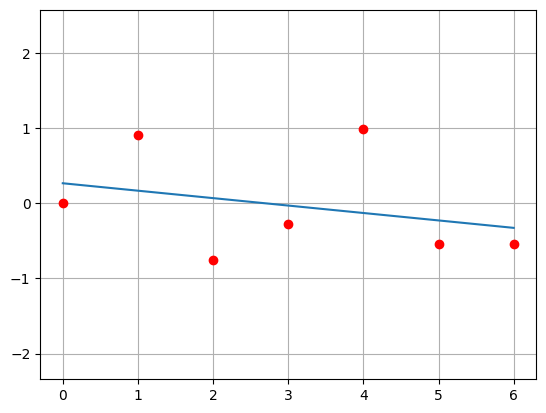

In [9]:
n = 7
x = np.arange(n)
y = np.sin(2*X)


A = np.vstack([x, np.ones(len(x))]).T
P = A.T.dot(A)
q = A.T.dot(y)
R = np.linalg.solve(P,q)

print('Решение:', R)

plt.plot(x,y,'ro')

linsp = np.linspace(x.min(), x.max())

f = np.poly1d(R) # Создаем поллином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика

plt.plot(linsp,fun)
plt.axis([-1,5,-5,5])
plt.axis('equal')
plt.grid(True)
